# Results analysis Notebook
## Author: Robert 
## Date: January 3, 2020 

Purpose of this notebook is to analyze the results obtained when changing number of opponents

In [1]:
## library imports

import pandas as pd ## for data manipulation
import numpy as np ## also for data manipulation
import matplotlib.pyplot as plt ## for plotting
from mpl_toolkits import mplot3d ## for 3D plotting 
from matplotlib import cm ## for heat map

In [2]:
## reading in results 

df = pd.read_csv(r"scoredbasedloopednumberofplayers.csv") ## results of looping opponent's possible maximum score
df

,NumberOfPlayers,Score,WinPercentage,AverageOpponentScore
0,2,50,0.1365,251.005000
1,2,100,0.2796,251.235000
2,2,150,0.4552,250.810000
3,2,200,0.5586,250.150000
4,2,250,0.6023,250.700000
...,...,...,...,...
337,19,750,0.0602,250.360000
338,19,800,0.0500,249.835556
339,19,850,0.0442,249.293333
340,19,900,0.0402,250.544167


In [3]:
## sorting values for some reason 

df = df.sort_values(by=['Score','NumberOfPlayers'],ascending=[True,True]).reset_index(drop=True)
df

,NumberOfPlayers,Score,WinPercentage,AverageOpponentScore
0,2,50,0.1365,251.005000
1,3,50,0.0383,251.420000
2,4,50,0.0153,251.490000
3,5,50,0.0096,249.381250
4,6,50,0.0047,248.758000
...,...,...,...,...
337,15,950,0.0396,250.407143
338,16,950,0.0371,250.182333
339,17,950,0.0364,249.185625
340,18,950,0.0365,249.695000


In [4]:
## showing matrix of win pcts based on score of the player and their opponent's maximum score value

df_pivoted = df.pivot(index="NumberOfPlayers",columns="Score",values="WinPercentage")
df_pivoted

Score,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950
NumberOfPlayers,,,,,,,,,,,,,,,,,,,
2,0.1365,0.2796,0.4552,0.5586,0.6023,0.6229,0.6287,0.6141,0.5931,0.5574,0.5230,0.4837,0.4495,0.3962,0.3689,0.3227,0.2888,0.2691,0.2258
3,0.0383,0.1105,0.2663,0.3675,0.4364,0.4553,0.4523,0.4496,0.4186,0.3983,0.3777,0.3425,0.3096,0.2730,0.2413,0.2079,0.1884,0.1727,0.1447
4,0.0153,0.0564,0.1672,0.2575,0.3283,0.3561,0.3546,0.3571,0.3433,0.3180,0.2949,0.2657,0.2340,0.2219,0.1944,0.1593,0.1449,0.1250,0.1080
5,0.0096,0.0343,0.1265,0.1962,0.2597,0.2907,0.3048,0.2969,0.2859,0.2644,0.2449,0.2310,0.2047,0.1746,0.1569,0.1291,0.1205,0.1068,0.0892
6,0.0047,0.0244,0.0898,0.1592,0.2200,0.2453,0.2587,0.2542,0.2446,0.2321,0.2121,0.1909,0.1716,0.1511,0.1262,0.1116,0.1015,0.0971,0.0760
7,0.0034,0.0174,0.0683,0.1299,0.1820,0.2213,0.2272,0.2243,0.2103,0.1997,0.1965,0.1657,0.1505,0.1301,0.1205,0.1034,0.0933,0.0827,0.0653
8,0.0018,0.0111,0.0580,0.1114,0.1641,0.1813,0.1954,0.2114,0.1989,0.1868,0.1824,0.1559,0.1390,0.1230,0.1148,0.0868,0.0775,0.0780,0.0623
9,0.0017,0.0100,0.0462,0.0973,0.1431,0.1682,0.1786,0.1810,0.1748,0.1684,0.1587,0.1437,0.1266,0.1098,0.1090,0.0844,0.0752,0.0691,0.0602
10,0.0013,0.0094,0.0383,0.0830,0.1287,0.1476,0.1664,0.1711,0.1632,0.1594,0.1419,0.1281,0.1134,0.1079,0.0892,0.0759,0.0667,0.0644,0.0539


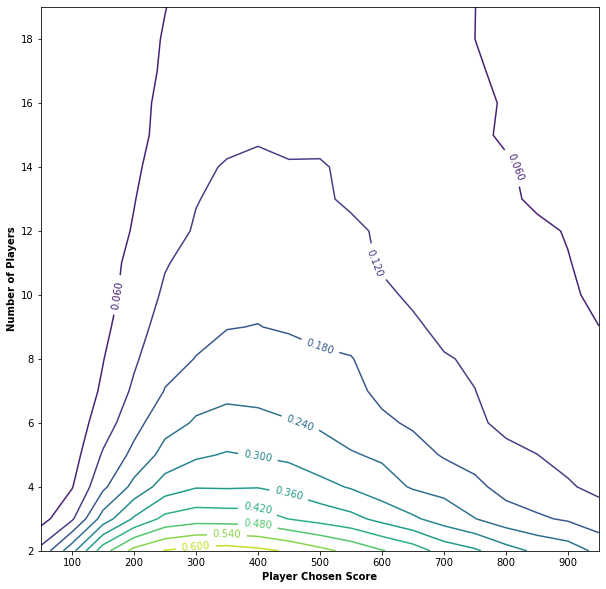

In [9]:
## contour plot

fig,ax = plt.subplots(1,figsize=(10,10))
contour = ax.contour(df_pivoted.columns,df_pivoted.index,df_pivoted,levels=10)
ax.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel("Player Chosen Score",fontweight='bold')
ax.set_ylabel("Number of Players",fontweight='bold')
plt.show()

In [10]:
## creating 2d matrices of combinations of score chosen by the player and max opponent score 
xx,yy = np.meshgrid(df_pivoted.columns,df_pivoted.index)

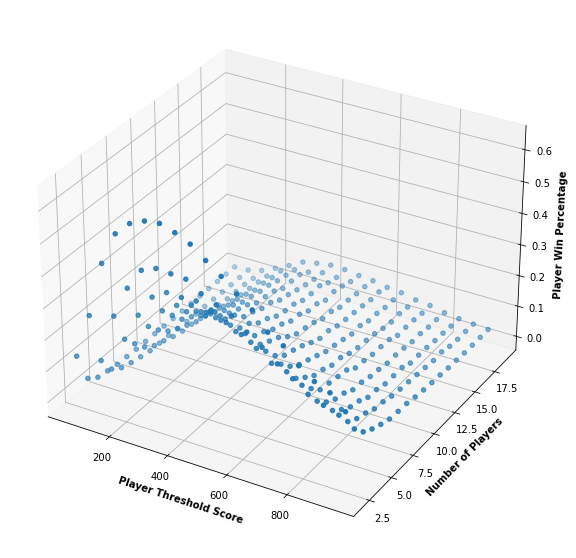

In [11]:
## 3D scatter plot of results

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(df.Score,df.NumberOfPlayers,df.WinPercentage)
ax.set_xlabel('Player Threshold Score',fontweight='bold')
ax.set_ylabel('Number of Players',fontweight='bold')
ax.set_zlabel('Player Win Percentage',fontweight='bold')
plt.show()

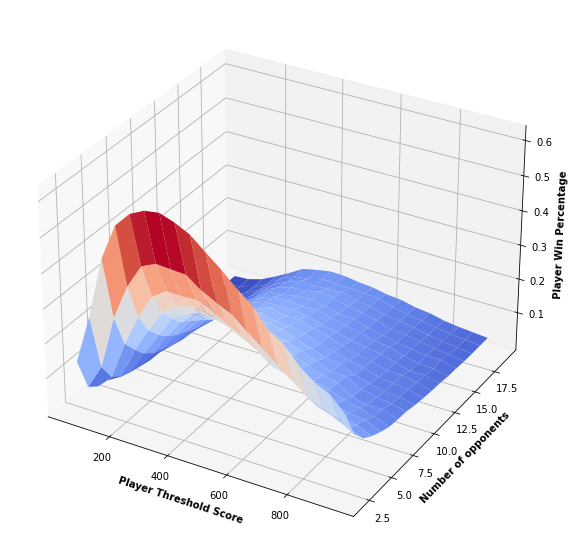

In [13]:
## surface plot 

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(xx,yy,df_pivoted.values,cmap=cm.coolwarm)

ax.set_xlabel('Player Threshold Score',fontweight='bold')
ax.set_ylabel('Number of opponents',fontweight='bold')
ax.set_zlabel('Player Win Percentage',fontweight='bold')
plt.show()